In [39]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline

In [40]:
np.random.seed(986951)
X = np.random.rand(8,2)
print(X)

[[0.02861526 0.52714882]
 [0.60719753 0.13084666]
 [0.07484784 0.39086966]
 [0.77180826 0.75651132]
 [0.39609829 0.198495  ]
 [0.3773891  0.85728436]
 [0.91174292 0.30133656]
 [0.84832625 0.3267953 ]]


In [41]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

In [42]:
def hierarchical_clustering(data, k):
    n = len(data)
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            distances[i,j] = euclidean_distance(data[i], data[j])
            distances[j,i] = distances[i,j]

    clusters = [{i} for i in range(n)]
    cluster_distances = distances.copy()

    while len(clusters) > k:
        min_distance = np.inf
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                distance = np.max([cluster_distances[x,y] for x in clusters[i] for y in clusters[j]])
                if distance < min_distance:
                    min_distance = distance
                    merge_i, merge_j = i, j

        clusters[merge_i] = clusters[merge_i].union(clusters[merge_j])
        del clusters[merge_j]

        for i in range(len(clusters)):
            if i != merge_i:
                distance = np.max([distances[x,y] for x in clusters[i] for y in clusters[merge_i]])
                cluster_distances[i, merge_i] = distance
                cluster_distances[merge_i, i] = distance

    return clusters

In [45]:
clusters = hierarchical_clustering(X, 2)
print(clusters)

[{0, 2}, {1, 3, 4, 5, 6, 7}]


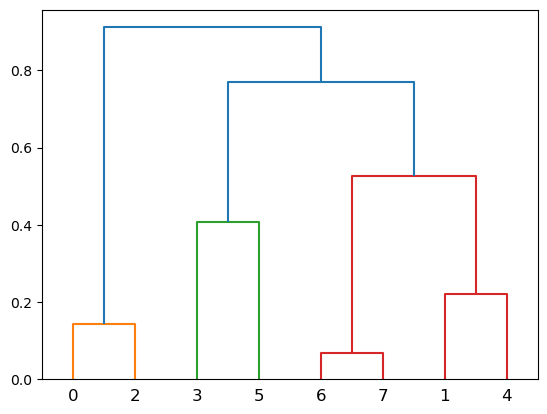

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
l = linkage(X, 'complete')
fig = plt.figure()
dn = dendrogram(l)